# <center> Pima Indians Diabetes Predictions with XGboost and KNN Classifiers <center>

# ![2.jpg](attachment:2.jpg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Prediction-of-Diabetes-Outcome" data-toc-modified-id="Prediction-of-Diabetes-Outcome-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prediction of Diabetes Outcome</a></span><ul class="toc-item"><li><span><a href="#K-Nearest-Neighbors-Classifier" data-toc-modified-id="K-Nearest-Neighbors-Classifier-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>K-Nearest Neighbors Classifier</a></span><ul class="toc-item"><li><span><a href="#Standardizing-the-Data" data-toc-modified-id="Standardizing-the-Data-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Standardizing the Data</a></span></li><li><span><a href="#Splitting-the-Data" data-toc-modified-id="Splitting-the-Data-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Splitting the Data</a></span></li><li><span><a href="#Finding-the-Optimal-number-of-Neighbors-(K)" data-toc-modified-id="Finding-the-Optimal-number-of-Neighbors-(K)-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Finding the Optimal number of Neighbors (K)</a></span></li></ul></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>XGBoost Classifier</a></span><ul class="toc-item"><li><span><a href="#Splitting-the-Data" data-toc-modified-id="Splitting-the-Data-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Splitting the Data</a></span></li><li><span><a href="#Creating-the-Model" data-toc-modified-id="Creating-the-Model-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Creating the Model</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases, and all patients here are females at least 21 years old of Pima Indian heritage. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. So, here we will perform exploratory data analysis and build two machine learning models with K-Nearest Neighbors Classifier and XGboost Classifier to accurately predict whether the patients in the dataset have diabetes or not.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

## Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/diabetes data set/7 feature datasetfinal.csv')

In [4]:
df.head()

,heartRate,glucose,Age,Sweating,Diabetic,hypoglycemia
0,98,79,9,0,0,0
1,102,80,9,1,0,0
2,81,70,9,1,0,0
3,96,70,9,1,0,0
4,92,100,66,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   heartRate     16969 non-null  int64
 1   glucose       16969 non-null  int64
 2   Age           16969 non-null  int64
 3   Sweating      16969 non-null  int64
 4   Diabetic      16969 non-null  int64
 5   hypoglycemia  16969 non-null  int64
dtypes: int64(6)
memory usage: 795.5 KB


In [6]:
df.shape

(16969, 6)

In [7]:
df.describe()

,heartRate,glucose,Age,Sweating,Diabetic,hypoglycemia
count,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000
mean,91.524427,95.741823,30.985326,0.121692,0.980612,0.303318
std,10.409627,42.987604,25.583324,0.326940,0.137889,0.459705
min,78.000000,50.000000,9.000000,0.000000,0.000000,0.000000
25%,84.000000,68.000000,9.000000,0.000000,1.000000,0.000000
50%,89.000000,83.000000,14.000000,0.000000,1.000000,0.000000
75%,95.000000,108.000000,55.000000,0.000000,1.000000,1.000000
max,130.000000,250.000000,77.000000,1.000000,1.000000,1.000000


In [8]:
print(df.dtypes.unique())

[dtype('int64')]


In [9]:
100*(df.isnull().sum())/(df.shape[0])

heartRate       0.0
glucose         0.0
Age             0.0
Sweating        0.0
Diabetic        0.0
hypoglycemia    0.0
dtype: float64

The dataset is pretty much structured and does not have any NaN values. So we do not need Data Cleaning.

## Exploratory Data Analysis

In [11]:
df['hypoglycemia'].value_counts()

0    11822
1     5147
Name: hypoglycemia, dtype: int64

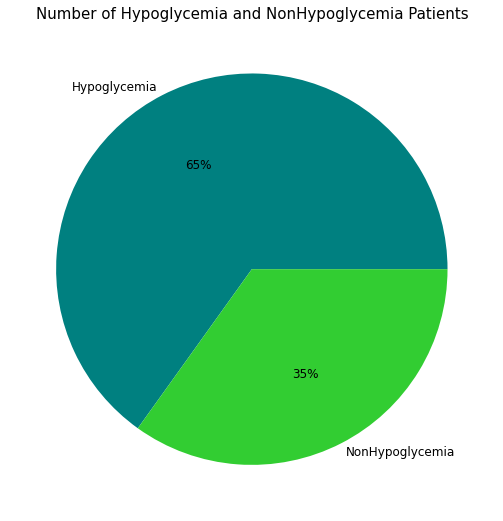

In [12]:
plt.figure(figsize=(9,9))
plt.pie(x=[500,268], labels=[ 'Hypoglycemia', 'NonHypoglycemia'], autopct='%1.0f%%',pctdistance=0.6,labeldistance=1.05,textprops={'fontsize':12},colors=['teal','limegreen'])
plt.title('Number of Hypoglycemia and NonHypoglycemia Patients',loc='center', fontsize=15)
plt.show()

In [14]:
df['hypoglycemia']=df['hypoglycemia'].apply(lambda x: 'Hypoglycemia' if x==1 else 'NonHypoglycemia')

In [15]:
df.head(2)

,heartRate,glucose,Age,Sweating,Diabetic,hypoglycemia
0,98,79,9,0,0,NonHypoglycemia
1,102,80,9,1,0,NonHypoglycemia


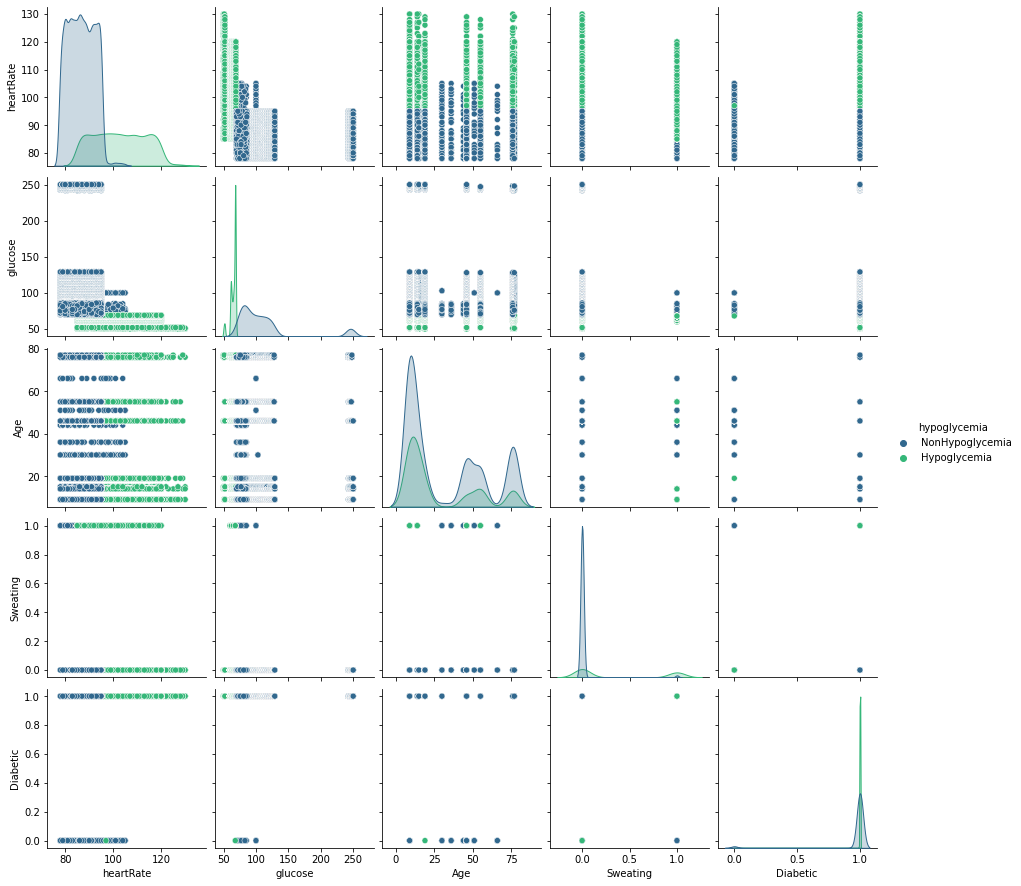

In [17]:
sns.pairplot(df,hue='hypoglycemia',palette='viridis')
plt.show()

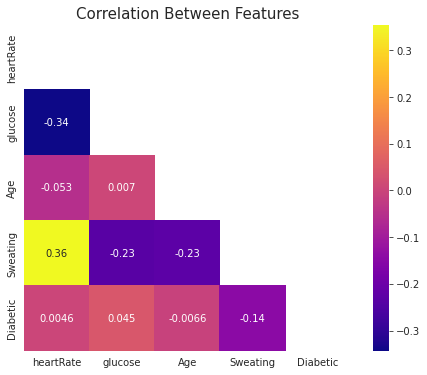

In [18]:
plt.figure(figsize=(8,6))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True, cmap= 'plasma')
plt.title('Correlation Between Features', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

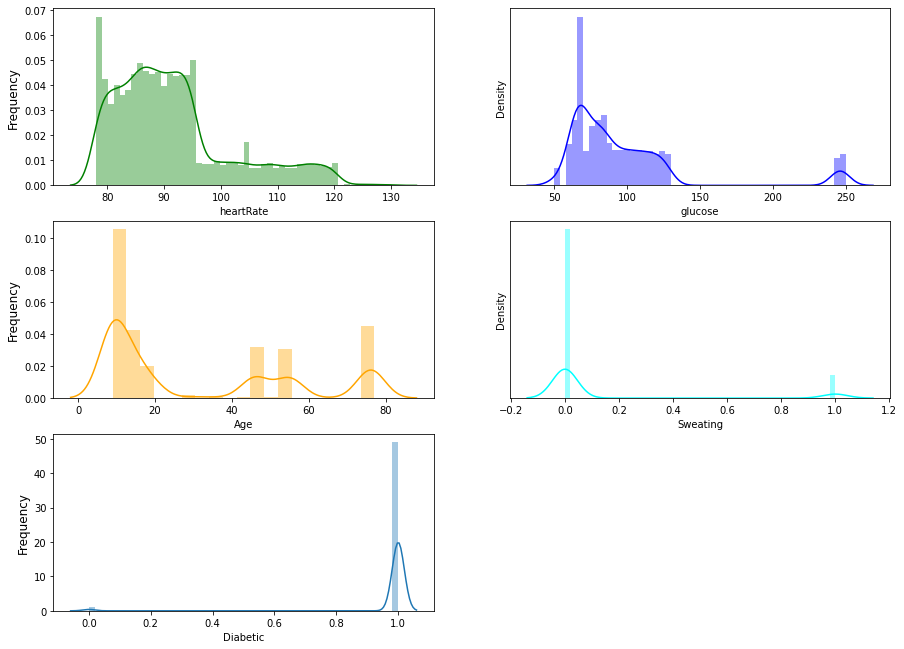

In [19]:
plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.distplot(df['heartRate'], color='green')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,2)
sns.distplot(df['glucose'], color='blue')
plt.yticks([])

plt.subplot(4,2,3)
sns.distplot(df['Age'], color='orange')
plt.ylabel('Frequency', fontsize=12)

plt.subplot(4,2,4)
sns.distplot(df['Sweating'], color='cyan')
plt.yticks([])

plt.subplot(4,2,5)
sns.distplot(df['Diabetic'])
plt.ylabel('Frequency', fontsize=12)

plt.show()

## Prediction of Diabetes Outcome

### K-Nearest Neighbors Classifier

#### Standardizing the Data

In [20]:
ss=StandardScaler()

In [22]:
ss.fit(df.drop(['hypoglycemia'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaled=ss.transform(df.drop(['hypoglycemia'], axis=1))

In [24]:
scaled_df=pd.DataFrame(data=scaled, columns=df.columns[:-1])

#### Splitting the Data

In [28]:
X=scaled_df
y=df['hypoglycemia']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Finding the Optimal number of Neighbors (K)

In [30]:
error_rate=[]

for n in range(1,40):
    knc=KNeighborsClassifier(n_neighbors=n)
    knc.fit(X_train, y_train)
    prediction_knn=knc.predict(X_test)
    error_rate.append(np.mean(prediction_knn!=y_test))
print(error_rate)

[0.0014731879787860931, 0.002357100766057749, 0.0017678255745433118, 0.0020624631703005302, 0.0014731879787860931, 0.002357100766057749, 0.0020624631703005302, 0.0029463759575721863, 0.0038302887448438423, 0.0035356511490866236, 0.0029463759575721863, 0.0020624631703005302, 0.0014731879787860931, 0.0017678255745433118, 0.002357100766057749, 0.0014731879787860931, 0.0020624631703005302, 0.0020624631703005302, 0.002357100766057749, 0.0014731879787860931, 0.0014731879787860931, 0.0017678255745433118, 0.0020624631703005302, 0.0020624631703005302, 0.0017678255745433118, 0.0014731879787860931, 0.0017678255745433118, 0.0017678255745433118, 0.0017678255745433118, 0.0017678255745433118, 0.002357100766057749, 0.002357100766057749, 0.002357100766057749, 0.0029463759575721863, 0.0029463759575721863, 0.0026517383618149676, 0.0026517383618149676, 0.003241013553329405, 0.003241013553329405]


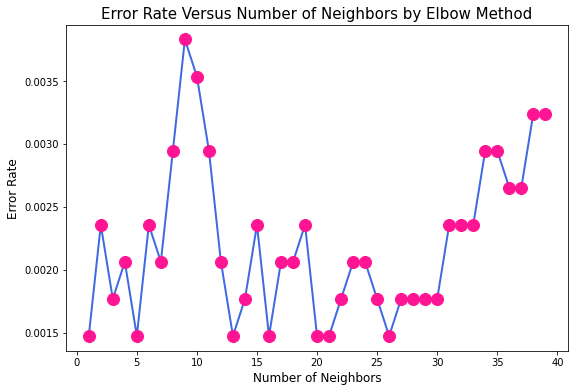

In [31]:
plt.figure(figsize=(9,6))
plt.plot(list(range(1,40)), error_rate,color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='deeppink', markeredgecolor='deeppink' )
plt.xlabel('Number of Neighbors', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate Versus Number of Neighbors by Elbow Method', fontsize=15)
plt.show()

We can see that for k=15, 17, 30 and 32 the error rate is minimum.

In [32]:
knc=KNeighborsClassifier(n_neighbors=15)
knc.fit(X_train, y_train)
prediction_knn=knc.predict(X_test)

In [33]:
print(confusion_matrix(y_test,prediction_knn))
print('\n')
print(classification_report(y_test,prediction_knn))
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_knn), ndigits=2))

[[ 994    5]
 [   3 2392]]


                 precision    recall  f1-score   support

   Hypoglycemia       1.00      0.99      1.00       999
NonHypoglycemia       1.00      1.00      1.00      2395

       accuracy                           1.00      3394
      macro avg       1.00      1.00      1.00      3394
   weighted avg       1.00      1.00      1.00      3394

Accuracy Score:  1.0


The accuracy of 81% is obtained by KNN model. Now let's test the prediction of our model for given values.

In [34]:
scaled_df.head()

,heartRate,glucose,Age,Sweating,Diabetic
0,0.622094,-0.389468,-0.859387,-0.372228,-7.111787
1,1.006365,-0.366205,-0.859387,2.686528,-7.111787
2,-1.011058,-0.598837,-0.859387,2.686528,-7.111787
3,0.429958,-0.598837,-0.859387,2.686528,-7.111787
4,0.045687,0.099059,1.368693,-0.372228,-7.111787


In [35]:
knc.predict([[0.639947,0.848324,0.149641,0.907270,-0.692891]])

array(['NonHypoglycemia'], dtype=object)

In [37]:
df['hypoglycemia'].iloc[0]

'NonHypoglycemia'

In [38]:
knc.predict([[-0.844885,-1.123396,-0.160546,0.530902,-0.692891]])

array(['Hypoglycemia'], dtype=object)

In [39]:
df['hypoglycemia'].iloc[3]

'NonHypoglycemia'

### XGBoost Classifier

#### Splitting the Data

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
X=df.drop(['hypoglycemia'], axis=1)
y=df['hypoglycemia']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Creating the Model

In [ ]:
xgbc = xgb.XGradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
xgbc.fit(X_train,y_train)

In [ ]:
prediction_xgbc=xgbc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,prediction_xgbc))
print('\n')
print(classification_report(y_test,prediction_xgbc))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_xgbc), ndigits=2))

We can see that the XGBoost Classifier has 82% accuracy in predictiong the result of diabetes.

## Conclusion

-  Here we worked on Pima Indians Diabetes Dataset and implemented XGboost and K-Nearest neighbors Classifications to predict whether the patients have diabetes. 
-  The accuracy of 81% was obtained by K-Nearest Neighbors Classifier. 
-  The XGBoost Classifier performed pretty well with 82% accuracy in predicting the result of diabetes.